# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

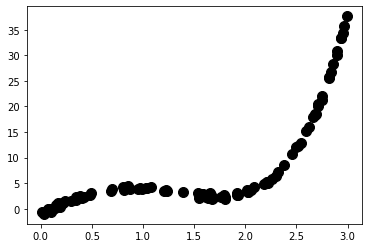

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10)
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([21.41299177,  8.32146329,  2.50516199, -1.26883705,  1.79321468,
        1.88217965, -1.01206676,  3.5830645 ,  2.77547567,  0.29946023,
       12.51921994,  2.40850932, -1.13363065,  1.97381203, 21.39921263,
        2.56732556, -0.60934492,  2.11207158, 27.41195384,  0.46158758,
        5.81276908, 24.1699216 , 18.50483995, 10.78544545,  7.45608097,
       27.79858581,  0.45326344, 12.12545921, 16.3289724 , 24.17541856,
       -1.23311791, -1.25312331,  3.29678514, -0.96522388,  7.83116645,
       22.3789251 , 11.43805502,  2.31847939, 20.78597723,  5.90427198])

In [6]:
def show_model_stats(model, X_test, y_test):
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

show_model_stats(model2, X_test, y_test)

Explained variance score: 0.8433421328430216
Explained variance score: 0.8433421328430216
Median absolute error: 3.3204784402822884
Mean squared error: 13.640546625242127
Mean absolute errors: 3.1311833743780624


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
polynomial_array = [1,2,3,4,5,25]

for i in polynomial_array:
    print(i)
    X_train = np.vstack(X_train)
    X_test = np.vstack(X_test)

    curr_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
    curr_model.fit(X_train, y_train)
    curr_model.predict(X_test)
    show_model_stats(curr_model, X_test, y_test)


1
Explained variance score: 0.5696758350002626
Explained variance score: 0.5696758350002626
Median absolute error: 3.6913674007867865
Mean squared error: 37.82754260687132
Mean absolute errors: 5.123059460404352
2
Explained variance score: 0.8433421328430216
Explained variance score: 0.8433421328430216
Median absolute error: 3.3204784402822884
Mean squared error: 13.640546625242127
Mean absolute errors: 3.1311833743780624
3
Explained variance score: 0.9932928586974457
Explained variance score: 0.9932928586974457
Median absolute error: 0.6794322646596398
Mean squared error: 0.588900018984303
Mean absolute errors: 0.6480794937848688
4
Explained variance score: 0.9992132367533237
Explained variance score: 0.9992132367533237
Median absolute error: 0.15943935484716243
Mean squared error: 0.06867689525841225
Mean absolute errors: 0.21175706815456716
5
Explained variance score: 0.9991870736273395
Explained variance score: 0.9991870736273395
Median absolute error: 0.16600842866876042
Mean squa